In [408]:
# import np, pd and matplotlib and seaborn
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

## Data Cleaning


### Data Reading & Data Types


In [409]:
# Read the data in pandas
inp0 = pd.read_csv(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Data-Sources\Data_Toolkits\Graded_DressAttribute.csv"
)
inp1 = pd.read_csv(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Data-Sources\Data_Toolkits\Graded_DressSales.csv"
)

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.

- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.

- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.

- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [410]:
# Which of the following column do you think are of no use in “Attribute DataSet”.
# - Dress_ID
# - Price
# - Size and material
# - NeckLine
# - None of the above

# answer is:
# - None of the above
# - Dress_ID: unique identifier for each dress, useful for tracking and analysis.



In [411]:
# Print the information about the attributes of inp0 and inp1.
display(inp0.info())
display(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

None

### Fixing the Rows and Columns


As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into “Medium”
- L into “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [412]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
inp0["Size"] = inp0["Size"].replace(
    {
        "free": "Free",
        "S": "Small",
        "M": "Medium",
        "L": "Large",
        "XL": "Extra Large",
        "s": "Small",
        'small': "Small",
    }
)

# Count the percentage of each size category in "Size" column.
inp0["Size"].value_counts(normalize=True) * 100

Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra Large     2.922756
Name: proportion, dtype: float64

In [413]:
# Print the value counts of each category in "Size" column.
inp0["Size"].value_counts()

Size
Medium         171
Free           165
Large           93
Small           36
Extra Large     14
Name: count, dtype: int64

### Impute/Remove Missing values


In [414]:
# Print the null count of each variables of inp0 and inp1.

display(inp0.isnull().sum())
display(inp1.isnull().sum())

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.


In [415]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [416]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
# inp1['09-12-2013'] = inp1['09-12-2013'].astype(float)

In [417]:
# Do the required changes in the "Dress Sales".csv data set to get null values on string values.
inp1 = inp1.replace(" ", np.nan)

In [418]:
# Convert the object type columns in "Dress Sales".csv into float type of data type.
object_columns = inp1.select_dtypes(include=["object"]).columns

# Loop through the identified object columns
for col in object_columns:
    # Attempt to convert the column to numeric, coercing errors
    # 'coerce' will replace values that cannot be converted (like '', 'Orders', 'Removed') with NaN
    # This automatically handles missing values represented as empty strings and specific non-numeric strings
    inp1[col] = pd.to_numeric(inp1[col], errors="coerce")

print(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.


In [419]:
# Print the null percetange of each column of inp1.
display(inp1.isnull().sum() / inp1.shape[0] * 100)

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.208768
14-09-2013     0.208768
16-09-2013     0.208768
18-09-2013     0.208768
20-09-2013     0.208768
22-09-2013     0.208768
24-09-2013     0.000000
26-09-2013    46.346555
28-09-2013     0.000000
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-06-2013     0.000000
10-08-2013    53.235908
10-10-2013    53.235908
10-12-2013     0.000000
dtype: float64

In [420]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
inp1 = inp1.dropna(thresh=0.6 * inp1.shape[0], axis=1)

display(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  28-09-2013  479 non-null    int64  
 16  10-06-2013  479 non-null    int64  
 17  10-12-2013  479 non-null    int64  
dtypes: float64(7), int64(11)
memory usage: 67.5 KB


None

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:

- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.


In [421]:
# Create the four seasons columns in inp1, according to the above criteria.
object_columns = inp1.select_dtypes(include=["object"]).columns
if "Dress_ID" in object_columns:
    object_columns = object_columns.drop("Dress_ID")  # Exclude Dress_ID if it's object

# Loop through the identified object columns and convert
for col in object_columns:
    inp1[col] = pd.to_numeric(inp1[col], errors="coerce")

# --- End: Code from previous step ---


# Function to map month number to season
def get_season(month):
    if month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    else:
        return "Unknown"  # Should not happen with valid dates


# Get all column names except 'Dress_ID'
date_columns = [col for col in inp1.columns if col != "Dress_ID"]

# Create dictionaries to store columns for each season
season_columns = {"Spring": [], "Summer": [], "Autumn": [], "Winter": []}

# Categorize columns by season
for col in date_columns:
    try:
        # Extract month from column name (assuming DD-MM-YYYY format)
        date_obj = pd.to_datetime(col, format="%d-%m-%Y")
        month = date_obj.month
        season = get_season(month)
        if season != "Unknown":
            season_columns[season].append(col)
    except ValueError:
        print(f"Warning: Could not parse date from column name: {col}. Skipping.")

# Calculate total sales for each season and add as new columns
# Use fillna(0) before summing if you want NaN to definitively count as 0 sales
# Otherwise, sum() handles NaN by skipping them (sum of NaNs is NaN unless skipna=False)
for season, cols in season_columns.items():
    if cols:  # Check if there are any columns for this season
        inp1[f"{season}_Sales"] = inp1[cols].sum(axis=1, skipna=True)
    else:
        inp1[f"{season}_Sales"] = 0  # Assign 0 if no columns found for a season

# Select and display the Dress_ID and the new seasonal sales columns
seasonal_summary = inp1[
    ["Dress_ID", "Spring_Sales", "Summer_Sales", "Autumn_Sales", "Winter_Sales"]
]

In [422]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".

# print sum all sales in each seasons in inp1 i.e. "Dress Sales".
seasonal_summary_sum = seasonal_summary[
    ["Spring_Sales", "Summer_Sales", "Autumn_Sales", "Winter_Sales"]
].sum()

seasonal_summary_sum = seasonal_summary_sum.reset_index()
seasonal_summary_sum.columns = ["Season", "Total_Sales"]
seasonal_summary_sum["Total_Sales"] = seasonal_summary_sum["Total_Sales"].astype(float)

print(seasonal_summary_sum)

         Season  Total_Sales
0  Spring_Sales     143600.0
1  Summer_Sales     691907.0
2  Autumn_Sales    1363288.0
3  Winter_Sales     474683.0


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.


In [423]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(
    left=inp0, right=inp1, how="left", left_on="Dress_ID", right_on="Dress_ID"
)
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Spring_Sales,Summer_Sales,Autumn_Sales,Winter_Sales
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,2660,13899,26857.0,9658.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,750,6216,17311.0,6405.0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,7,40,82.0,28.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,1455,7213,14411.0,5012.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,1396,7706,14676.0,5678.0


In [424]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:, "29-08-2013":"10-12-2013"].columns, axis=1, inplace=True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Spring_Sales        0
Summer_Sales        0
Autumn_Sales        0
Winter_Sales        0
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.


In [425]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
display(inp0.isnull().sum())

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Spring_Sales        0
Summer_Sales        0
Autumn_Sales        0
Winter_Sales        0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn.

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.


In [426]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
# Price is Low, Average, High values. So, we can fill the missing values with the mode of the column.
inp0["Price"].fillna(inp0["Price"].mode()[0], inplace=True)
# Season is Summer, Autumn, Winter, Spring. So, we can fill the missing values with the mode of the column.
inp0["Season"].fillna(inp0["Season"].mode()[0], inplace=True)
# So, we can fill the missing values with the mode of the column.
inp0["NeckLine"].fillna(inp0["NeckLine"].mode()[0], inplace=True)
# SleeveLength is Full, Half, Sleeveless. So, we can fill the missing values with the mode of the column.
inp0["SleeveLength"].fillna(inp0["SleeveLength"].mode()[0], inplace=True)
# Winter is 0, 1. So, we can fill the missing values with the mode of the column.
inp0["Winter_Sales"].fillna(inp0["Winter_Sales"].mode()[0], inplace=True)
# Autumn is 0, 1. So, we can fill the missing values with the mode of the column.
inp0["Autumn_Sales"].fillna(inp0["Autumn_Sales"].mode()[0], inplace=True)

C:\Users\ttcha\AppData\Local\Temp\ipykernel_2264\2096015698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inp0["Price"].fillna(inp0["Price"].mode()[0], inplace=True)
C:\Users\ttcha\AppData\Local\Temp\ipykernel_2264\2096015698.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [427]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
# drop values in Material, FabricType, Decoration and Pattern Type columns.
inp0.dropna(subset=["Material", "FabricType", "Decoration", "Pattern Type"], inplace=True)

### Standardise value


In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.

- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [428]:
display(inp0["Season"].value_counts().index.tolist())

['Spring', 'Summer', 'Winter', 'Automn', 'winter', 'Autumn']

In [429]:
# correcting the spellings.
inp0["NeckLine"] = inp0["NeckLine"].replace(
    {
        "o-neck": "O-Neck",
        "v-neck": "V-Neck",
        "slash-neck": "Slash-Neck",
        "boat-neck": "Boat-Neck",
        "Sweetheart": "Sweet Heart",
        "turndowncollor": "Turndown Collar",
        "bowneck": "Bow Neck",
        "peterpan-collor": "Peter Pan Collar",
        "sqare-collor": "Square Collar",
        "open": "Open Neck",
        "Scoop": "Scoop Neck",
        "ruffled": "Ruffled Neck",
        "mandarin-collor": "Mandarin Collar",
        "sweetheart": "Sweet Heart",
        "halter": "Halter Neck",
        "backless": "Backless Neck",
    }
)

inp0["Season"] = inp0["Season"].replace(
    {
        "Spring": "Spring",
        "Autumn": "Autumn",
        "Summer": "Summer",
        "Winter": "Winter",
        "spring": "Spring",
        "autumn": "Autumn",
        "summer": "Summer",
        "winter": "Winter",
    }
)
inp0["FabricType"] = inp0["FabricType"].replace(
    {
        "chiffon": "Chiffon",
        "tulle": "Tulle",
        "satin": "Satin",
        "jersey": "Jersey",
        "denim": "Denim",
        "cotton": "Cotton",
        "rayon": "Rayon",
        "polyester": "Polyester",
        "lace": "Lace",
        "silk": "Silk",
        # 'other': 'Other',
    }
)

inp0["Decoration"] = inp0["Decoration"].replace(
    {
        "beading": "Beading",
        "embroidery": "Embroidery",
        "ruffles": "Ruffles",
        "lace": "Lace",
        "appliques": "Appliques",
        "bow": "Bow",
        "button": "Button",
        # 'other': 'Other',
    }
)
inp0["Pattern Type"] = inp0["Pattern Type"].replace(
    {
        "solid": "Solid",
        "striped": "Striped",
        "floral": "Floral",
        "polka dot": "Polka Dot",
        "animal": "Animal",
        "geometric": "Geometric",
        # 'other': 'Other',
    }
)

In [430]:
# correcting the Spellings.

## Univariate Analysis


### Categorical Unordered Univariate Analysis


There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.

- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [431]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
# Total sales
inp0["Total_Sales"] = (
    inp0["Spring_Sales"]
    + inp0["Summer_Sales"]
    + inp0["Autumn_Sales"]
    + inp0["Winter_Sales"]
)

# Replace categories with less than 50000 sales with "Others"
inp0.loc[inp0["Total_Sales"] < 50000, "Style"] = "Others"

# Grpup by "Style" and sum the sales
inp0_grouped = inp0.groupby("Style").sum(numeric_only=True).reset_index()

display(inp0_grouped.head(10))

,Style,Dress_ID,Rating,Recommendation,Spring_Sales,Summer_Sales,Autumn_Sales,Winter_Sales,Total_Sales
0,Others,91552461443,346.4,40,34309,168565,324807.0,115188.0,642869.0
1,cute,629131530,4.7,1,7374,35577,55532.0,20388.0,118871.0


What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?

- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [432]:
# Calculate the percentage of each categories in the "Style" variable.
inp0["Style"].value_counts(normalize=True) * 100

Style
Others    99.009901
cute       0.990099
Name: proportion, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.


In [433]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.

inp0["NeckLine"] = inp0.loc[inp0["Total_Sales"] < 50000, "NeckLine"] = "Others"

inp0["NeckLine"].value_counts()

NeckLine
Others    101
Name: count, dtype: int64

In [434]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
inp0["SleeveLength"] = inp0.loc[inp0["Total_Sales"] < 50000, "SleeveLength"] = "Others"
inp0["SleeveLength"].value_counts()

SleeveLength
Others    101
Name: count, dtype: int64

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons


In [435]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
inp0["Material"] = inp0.loc[inp0["Total_Sales"] < 25000, "Material"] = "Others"
inp0["Material"].value_counts()

Material
Others    101
Name: count, dtype: int64

In [436]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
inp0["FabricType"] = inp0.loc[inp0["Total_Sales"] < 25000, "FabricType"] = "Others"
inp0["FabricType"].value_counts()

FabricType
Others    101
Name: count, dtype: int64

In [437]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
inp0["Pattern Type"] = inp0.loc[inp0["Total_Sales"] < 25000, "Pattern Type"] = "Others"
inp0["Pattern Type"].value_counts()

Pattern Type
Others    101
Name: count, dtype: int64

In [438]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.

inp0["Decoration"] = inp0.loc[inp0["Total_Sales"] < 25000, "Decoration"] = "Others"
inp0["Decoration"].value_counts()

Decoration
Others    101
Name: count, dtype: int64

### Caregorical Ordered Univariate Analysis


Which of the following is an unordered variable in “Attribute DataSet”.

- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:


What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.

- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000


In [439]:
# Describe the numerical variale: "Autumn".
inp0["Autumn_Sales"].describe()

count      101.000000
mean      3765.732673
std       6799.454846
min          1.000000
25%        497.000000
50%       1646.000000
75%       3913.000000
max      55532.000000
Name: Autumn_Sales, dtype: float64

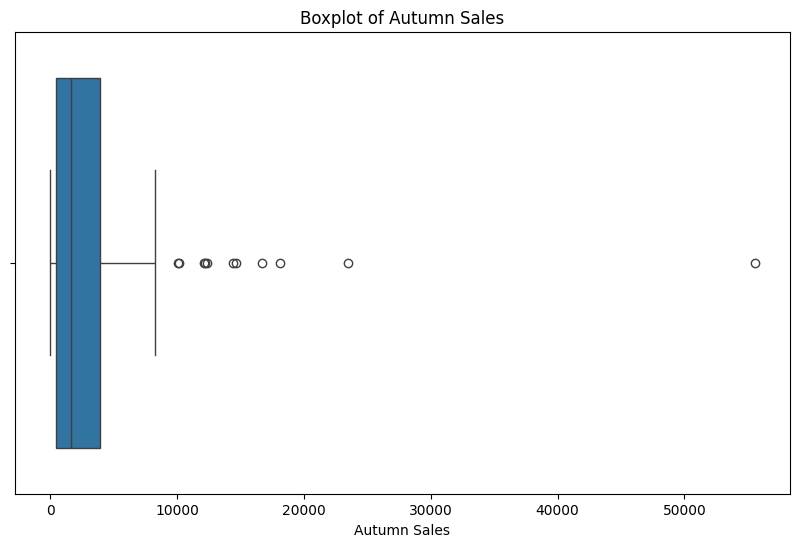

In [440]:
# plot the boxplot of "Autumn" column.
plt.figure(figsize=(10, 6))
sns.boxplot(x=inp0["Autumn_Sales"])
plt.title("Boxplot of Autumn Sales")
plt.xlabel("Autumn Sales")
plt.show()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?

- Winter
- Summer
- Spring
- Autumn


In [441]:
# Find the maximum and 99th percentile of Winter season.
inp0["Winter_Sales"].max(), inp0["Winter_Sales"].quantile(0.99)

(np.float64(20388.0), np.float64(8697.0))

In [442]:
# Find the maximum and 99th percentile of Summer season.
inp0["Summer_Sales"].max(), inp0["Summer_Sales"].quantile(0.99)

(np.int64(35577), np.float64(14149.0))

In [443]:
# Find the maximum and 99th percentile of Spring season.
inp0["Spring_Sales"].max(), inp0["Spring_Sales"].quantile(0.99)

(np.int64(7374), np.float64(2844.0))

In [444]:
# Find the maximum and 99th percentile of Autumn season.
inp0["Autumn_Sales"].max(), inp0["Autumn_Sales"].quantile(0.99)

(np.float64(55532.0), np.float64(23483.0))

## Bivariate Analysis


### Numerical- Categorical analysis


Which of the following “Price” category has the lowest average value of rating?

- very-high
- Medium
- Low
- High


In [445]:
# Find the Mean of Ratings for each Price category.
inp0.groupby("Price")["Rating"].mean().reset_index().sort_values(
    by="Rating", ascending=False
)

,Price,Rating
2,Low,3.990698
3,Medium,3.328571
0,Average,3.100000
1,High,2.150000


What is the median of the rating of “vintage” category in Style column?

- 4.6
- 4.7
- 4.55
- 0.00


In [446]:
# Find the median of Ratings for each Style category.
inp0.groupby("Style")["Rating"].median().reset_index().sort_values(
    by="Rating", ascending=False
)

,Style,Rating
1,cute,4.7
0,Others,4.6


Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.

- Summer
- Spring
- Autumn
- Winter


In [447]:
# Summer sale vs Recommendation.
inp0.groupby("Recommendation")["Summer_Sales"].mean().reset_index().sort_values(
    by="Summer_Sales", ascending=False
)

,Recommendation,Summer_Sales
1,1,2105.048780
0,0,1963.916667


In [448]:
# Spring sale vs Recommendation.
inp0.groupby("Recommendation")["Spring_Sales"].mean().reset_index().sort_values(
    by="Spring_Sales", ascending=False
)

,Recommendation,Spring_Sales
1,1,427.146341
0,0,402.833333


In [449]:
# Autumn sale vs Recommendation.
inp0.groupby("Recommendation")["Autumn_Sales"].mean().reset_index().sort_values(
    by="Autumn_Sales", ascending=False
)

,Recommendation,Autumn_Sales
0,0,3775.966667
1,1,3750.756098


In [450]:
# Winter sale vs Recommendation.
inp0.groupby("Recommendation")["Winter_Sales"].mean().reset_index().sort_values(
    by="Winter_Sales", ascending=False
)

,Recommendation,Winter_Sales
1,1,1359.878049
0,0,1330.350000


### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?

- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [451]:
# Size vs Recommendation.
inp0.groupby("Size")["Recommendation"].mean().reset_index().sort_values(
    by="Recommendation", ascending=False
)

,Size,Recommendation
0,Extra Large,0.500000
3,Medium,0.448276
1,Free,0.404762
2,Large,0.391304
4,Small,0.000000


### Multivariate analysis


Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?

- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


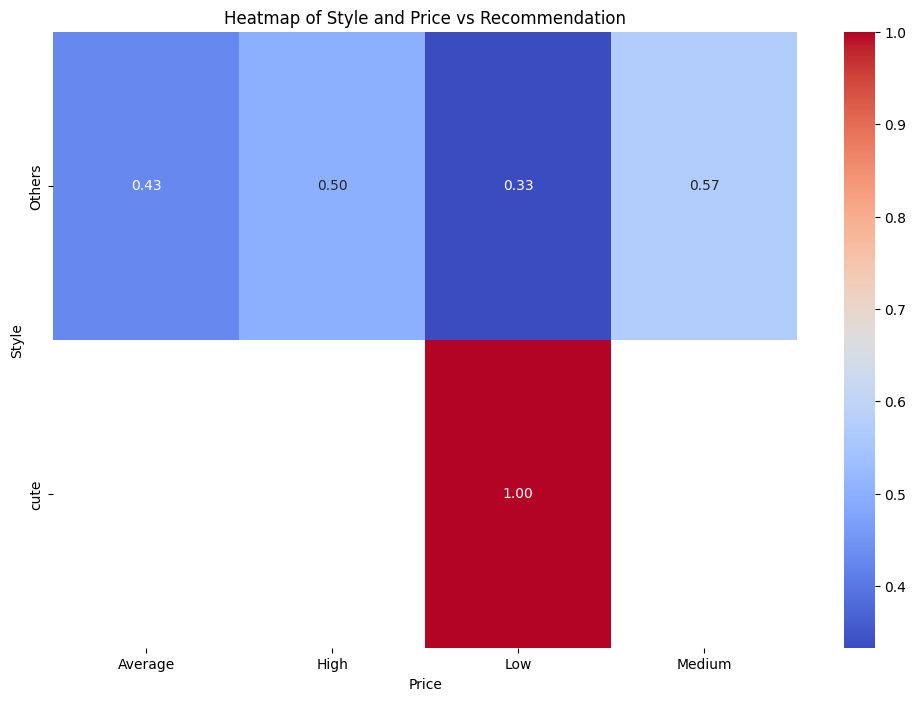

In [452]:
# plot the heat map of Style, price and Recommendation.
# Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
plt.figure(figsize=(12, 8))
sns.heatmap(
    inp0.pivot_table(
        index="Style",
        columns="Price",
        values="Recommendation",
        aggfunc="mean",
    ),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Heatmap of Style and Price vs Recommendation")
plt.xlabel("Price")
plt.ylabel("Style")
plt.show()


Which of the following material type has no recommendation in summer and winter seasons?

- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


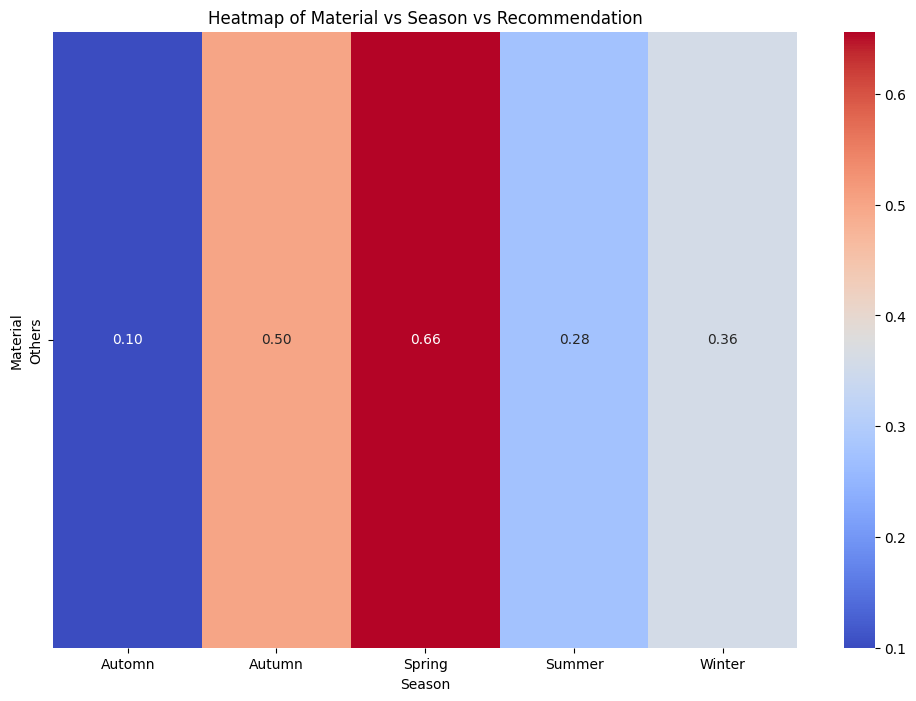

In [453]:
# plot the heat map of Season, material and Recommendation.
# Which of the following material type has no recommendation in summer and winter seasons?
plt.figure(figsize=(12, 8))
sns.heatmap(
    inp0.pivot_table(
        index="Material",
        columns="Season",
        values="Recommendation",
        aggfunc="mean",
    ),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Heatmap of Material vs Season vs Recommendation")
plt.xlabel("Season")
plt.ylabel("Material")
plt.show()